In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.stats import norm
from spectrum import CTAElectronSpectrum, CosmicRaySpectrum, MCSpectrum, CosmicRaySpectrumPDG, CTAProtonSpectrum
import fact.io
%matplotlib inline

In [2]:
e_spectrum =  CTAElectronSpectrum()
e_spectrum.flux(1*u.TeV)

<Quantity 5.66251456e-09 1 / (cm2 s sr TeV)>

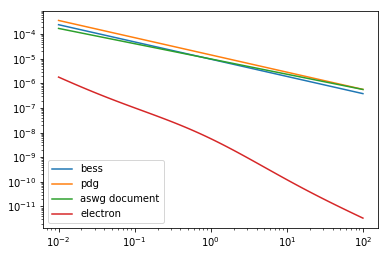

In [12]:
es = np.logspace(-2, 2, 100) * u.TeV
plt.plot(es, CosmicRaySpectrum().flux(es) * es**2, label='bess')
plt.plot(es, CosmicRaySpectrumPDG().flux(es) * es**2, label='pdg')
plt.plot(es, CTAProtonSpectrum().flux(es) * es**2, label='aswg document')
plt.plot(es, CTAElectronSpectrum().flux(es) * es**2, label='electron')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [4]:
columns = ['gamma_prediction_mean', 'gamma_energy_prediction_mean', 'az_prediction', 'alt_prediction', 'mc_alt', 'mc_az', 'mc_energy']

electron_input = '../../cta_rta_analysis/build/electrons_test.hdf5'

electrons = fact.io.read_data(electron_input, key='array_events', columns=columns)
electrons = electrons.dropna()
electrons['type'] = 2
electron_runs = fact.io.read_data(electron_input, key='runs')
mc_production_electron = MCSpectrum.from_cta_runs(electron_runs)

cosmic_proton = CosmicRaySpectrum()
cosmic_electron = CTAElectronSpectrum()

In [5]:
mc_production_electron

E_Min:0.003000000026077032 TeV, E_Max:330.0 TeV, N_total:260000000, index:-2.0, normalization contant:0.28900429152864476 1 / (m2 s sr TeV)

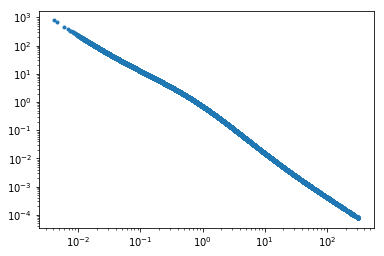

In [6]:
weights = mc_production_electron.reweigh_to_other_spectrum(cosmic_electron, electrons.mc_energy.values * u.TeV, t_assumed_obs=1*u.h)

plt.plot(electrons.mc_energy, weights, '.')

weights = mc_production_electron.reweigh_to_other_spectrum(cosmic_electron, electrons.mc_energy.values * u.TeV, t_assumed_obs=1*u.h)

plt.plot(electrons.mc_energy, weights, '.')
plt.yscale('log')
plt.xscale('log')

In [7]:
def f(E):
    I_0 = 2.385E-9 * u.Unit('cm-2 s-1 TeV-1 sr-1')

    gamma = 3.43
    mu = -0.101
    sigma = 0.741
    f = 1.95
    
    b = (1 + f * (np.exp(norm.pdf(np.log(E/u.TeV), loc=mu, scale=sigma)) - 1))
    N = I_0*(E/u.TeV)**(-gamma)
    flux = N * b
    return flux.to('m-2 s-1 TeV-1 sr-1')

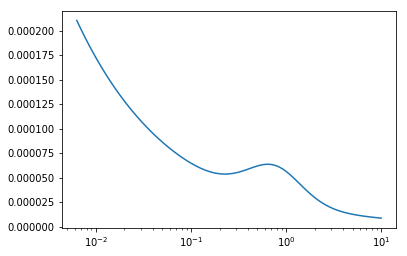

In [8]:
es = np.logspace(-2.2, 1, 100) * u.TeV
flux = f(es)
plt.plot(es, flux * es**3)
# plt.plot(es, e_spectrum.flux(es) * es**3, '--')
plt.xscale('log')



In [9]:
e_spectrum.expected_events_for_bins(1*u.km**2, 1*u.h, [1, 2, 3, 4, 5] * u.TeV, 4  * u.deg)

array([1018.06224278,  130.22669193,   35.48862891,   13.60834443])